In [16]:
import pandas as pd


In [17]:
# Загрузка данных из файлов
merged_full = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/extracted/merged_by_date_full.csv')
merged_partial = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/extracted/merged_by_date.csv')
df_clusters = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/extracted/df1_with_clusters.csv')
cat1_moscow = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/raw/cat1_moscow_objects.csv')


In [18]:
# Проверка содержимого каждого файла
file_contents = {
    "merged_by_date_full": merged_full.head(),
    "merged_by_date": merged_partial.head(),
    "df1_with_clusters": df_clusters.head(),
    "cat1_moscow_objects": cat1_moscow.head(),
}


In [19]:
file_contents

{'merged_by_date_full':    index        date  pm25_min  pm10_min    o3_min  no2_min  co_min  aqi_min  \
 0      0  2024-06-09      15.0      12.0  0.007000    0.009     1.0    57.10   
 1      1  2024-06-10      33.0      11.0  0.011154    0.009     2.0    94.95   
 2      2  2024-06-11      34.0      19.0  0.011154    0.011     1.0    97.06   
 3      3  2024-06-12      40.0       8.0  0.011154    0.008     1.0   112.08   
 4      4  2024-06-13      21.0       8.0  0.011154    0.005     1.0    69.72   
 
    pm25_max  pm10_max  ...  coco_max  temp_mean  dwpt_mean  rhum_mean  \
 0      34.0      42.0  ...       3.0  17.750000   8.890000  58.100000   
 1      52.0      40.0  ...       7.0  19.158333  13.295833  70.458333   
 2      49.0      24.0  ...       7.0  20.708333  17.754167  83.916667   
 3      64.0      22.0  ...       7.0  21.341667  18.304167  83.791667   
 4      56.0      21.0  ...       7.0  18.870833  17.333333  90.958333   
 
    prcp_mean  snow_mean   wdir_mean  wspd_

In [20]:
file_shapes = {
    "merged_by_date_full": merged_full.shape,
    "merged_by_date": merged_partial.shape,
    "df1_with_clusters": df_clusters.shape,
    "cat1_moscow_objects": cat1_moscow.shape,
}


In [21]:
file_shapes

{'merged_by_date_full': (179, 47),
 'merged_by_date': (179, 16),
 'df1_with_clusters': (1791, 12),
 'cat1_moscow_objects': (198, 25)}

In [22]:
# Объединение данных по дате
merged_full['date'] = pd.to_datetime(merged_full['date'])
df_clusters['date'] = pd.to_datetime(df_clusters['date'])


In [23]:
# Присоединение данных о кластерах к полной таблице
merged_data = pd.merge(merged_full, df_clusters, on='date', how='left', suffixes=('_full', '_cluster'))



In [24]:
# Проверим результат объединения
merged_data.head(), merged_data.shape

(   index       date  pm25_min  pm10_min  o3_min  no2_min  co_min  aqi_min  \
 0      0 2024-06-09      15.0      12.0   0.007    0.009     1.0     57.1   
 1      0 2024-06-09      15.0      12.0   0.007    0.009     1.0     57.1   
 2      0 2024-06-09      15.0      12.0   0.007    0.009     1.0     57.1   
 3      0 2024-06-09      15.0      12.0   0.007    0.009     1.0     57.1   
 4      0 2024-06-09      15.0      12.0   0.007    0.009     1.0     57.1   
 
    pm25_max  pm10_max  ...  pm10        o3    no2   co  \
 0      34.0      42.0  ...  12.0  0.017000  0.019  1.0   
 1      34.0      42.0  ...  23.0  0.023000  0.009  2.0   
 2      34.0      42.0  ...  20.0  0.014315  0.025  4.0   
 3      34.0      42.0  ...  21.0  0.031000  0.026  3.0   
 4      34.0      42.0  ...  23.0  0.021000  0.038  1.0   
 
                         station_name    aqi   latitude  longitude  \
 0     Shabol, Moscow, Moscow, Russia  61.30  55.715698  37.605238   
 1     Spirid, Moscow, Moscow, Rus

In [25]:
# Просмотр ключевых столбцов в таблице cat1_moscow_objects
cat1_moscow.info()
cat1_moscow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 25 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                 --------------  -----  
 0   665936                                                                            

,665936,46-0167-004506-П,"Объект технической рекультивации карьера Чулковского месторождения кварцевых песков в Раменском районе ООО ""ТД Промресурс""","Московская обл, Раменский район, с.п. Чулковское, с Еганово, д.20 ( к/н 50:23:0040330:63, 50:23:0040330:64) ,",46768000,Federal,1.0,26.0,"{08.11,08.12,08.91,08.99,23.51,23.52,23.70,23.91,23.99,38.11,38.21,41.10,41.20,43.11,43.12,43.13,43.21,43.22,43.29,43.31,43.32,43.33,43.34,43.39,43.91,43.99,46.12,46.13,46.19,46.44,46.49,46.63,46.69,46.71,46.72,46.73,46.74,46.75,46.77,46.90,47.30,47.51,47.52,47.53,47.59,47.91,47.99,49.41,52.10,52.24,52.29,68.10,68.20,69.10,69.20,70.22,73.11,77.11,77.12,77.31,77.32,77.39}",Unnamed: 9,...,2018-05-07 21:00:00,7702431427,772701001,t,"г Москва, ул Одесская, д 2, помещ III ком 3 офис 3",117638,45901000,55.53940169185199,38.04335046056074,f
0,618608,46-0167-003469-П,Мусоросортировочный комплекс,"Московская область, Ленинский городской окру, ...",46707000,Federal,1.0,26.0,{38.22},NaN,...,2020-06-03 21:00:00,5.003140e+09,500301001.0,t,"Московская обл, г Видное, ул Школьная, д 62, о...",142703.0,4.670700e+10,55.556973,37.771158,f
1,600786,46-0167-003316-П,"Городские очистные сооружения г.о. Жуковский,...","140180, Московская обл., г.о. Жуковский, район...",46725000,Federal,1.0,26.0,"{36.00.1,36.00.2,37.00,38.11,38.21,42.11,42.21...",NaN,...,2000-10-09 20:00:00,5.013002e+09,504001001.0,t,"МОСКОВСКАЯ ОБЛАСТЬ, Г. ЖУКОВСКИЙ, УЛ. ГАГАРИНА,",NaN,NaN,NaN,NaN,NaN
2,633936,17-0137-000125-П,"Производственная площадка №2 ООО ""Красное Эхо""","Владимирская обл, Гусь-Хрустальный р-н, посело...",17620490,Federal,1.0,25.0,{23.13},NaN,...,2008-06-26 20:00:00,3.314006e+09,772201001.0,t,"г Москва, Волгоградский пр-кт, д 35, помещ 614",109316.0,4.539200e+07,55.677082,40.219494,f
3,648998,46-0167-004154-П,Животноводческий комплекс,"Московская область, Шатурский район, сельское ...",46786000,Federal,1.0,26.0,"{01.1,01.2,01.4,01.5,01.6,01.7,10.51}",NaN,...,2007-05-02 20:00:00,5.049017e+09,504901001.0,t,"Московская обл, г Шатура, село Середниково",140760.0,4.678600e+10,55.294483,39.544971,f
4,585122,46-0250-007851-П,КПО Нева,"Московская обл., Солнечногорский район, г.п. П...",46771000,Federal,1.0,26.0,{38.12},NaN,...,2020-03-02 21:00:00,5.044118e+09,504401001.0,t,"141503, ОБЛАСТЬ МОСКОВСКАЯ, ГОРОД СОЛНЕЧНОГОРС...",NaN,4.677100e+10,56.047710,36.997353,f


In [26]:
from geopy.distance import geodesic

# Добавим координаты предприятий
cat1_moscow = cat1_moscow.rename(columns={
    '55.53940169185199': 'latitude_enterprise',
    '38.04335046056074': 'longitude_enterprise'
}).dropna(subset=['latitude_enterprise', 'longitude_enterprise'])


In [27]:
# Рассчет расстояний от станций мониторинга до предприятий
def calculate_nearest(row, enterprises):
    station_coords = (row['latitude'], row['longitude'])
    enterprises['distance'] = enterprises.apply(
        lambda x: geodesic(station_coords, (x['latitude_enterprise'], x['longitude_enterprise'])).kilometers, axis=1
    )
    nearest = enterprises.loc[enterprises['distance'].idxmin()]
    return pd.Series({
        'enterprise_distance': nearest['distance'],
        'enterprise_name': nearest['Объект технической рекультивации карьера Чулковского месторождения кварцевых песков в Раменском районе ООО "ТД Промресурс"']
    })


In [28]:
# Применение функции для каждой станции
merged_data[['enterprise_distance', 'enterprise_name']] = merged_data.apply(
    calculate_nearest, axis=1, enterprises=cat1_moscow
)


In [29]:
# Проверим результат
merged_data.head()[['date', 'station_name', 'latitude', 'longitude', 'enterprise_name', 'enterprise_distance']]

,date,station_name,latitude,longitude,enterprise_name,enterprise_distance
0,2024-06-09,"Shabol, Moscow, Moscow, Russia",55.715698,37.605238,"ЗАО ""Новая Заря""",1.104342
1,2024-06-09,"Spirid, Moscow, Moscow, Russia",55.759354,37.595584,"ТЭЦ-12 - филиал ПАО ""Мосэнерго""",3.537464
2,2024-06-09,"Veshnyaki, Moscow, Moscow, Russia",55.719959,37.795549,"Пруд-отстойник ""Жулебино""",3.199455
3,2024-06-09,"Suhar, Moscow, Moscow, Russia",55.773757,37.627445,"Общество с ограниченной ответственностью ""Ост...",4.682489
4,2024-06-09,"Mgu, Moscow, Moscow, Russia",55.707241,37.522410,"ТЭЦ-12 - филиал ПАО ""Мосэнерго""",3.885009


In [30]:
# Обработка пропусков
# Заполним пропуски в осадках (prcp) медианным значением
for col in ['prcp_min', 'prcp_max', 'prcp_mean']:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Проверим, остались ли пропуски в наборе данных
missing_values = merged_data.isnull().sum()
missing_values[missing_values > 0]

/var/folders/1s/5zrmnc61429fjndvw10l0mb80000gn/T/ipykernel_33729/386066585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(merged_data[col].median(), inplace=True)
/var/folders/1s/5zrmnc61429fjndvw10l0mb80000gn/T/ipykernel_33729/386066585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

Series([], dtype: int64)

In [31]:
# Удалим только существующие столбцы
columns_to_drop = ['Unnamed: 0', 'index', 'date', 'station_name', 'aqi', 'enterprise_name']
features = merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns])

# Список числовых и категориальных признаков
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['cluster']

# Проверим обновлённый набор признаков
features.head(), numeric_features, categorical_features

(   pm25_min  pm10_min  o3_min  no2_min  co_min  aqi_min  pm25_max  pm10_max  \
 0      15.0      12.0   0.007    0.009     1.0     57.1      34.0      42.0   
 1      15.0      12.0   0.007    0.009     1.0     57.1      34.0      42.0   
 2      15.0      12.0   0.007    0.009     1.0     57.1      34.0      42.0   
 3      15.0      12.0   0.007    0.009     1.0     57.1      34.0      42.0   
 4      15.0      12.0   0.007    0.009     1.0     57.1      34.0      42.0   
 
    o3_max  no2_max  ...  pm25  pm10        o3    no2   co   latitude  \
 0   0.033    0.038  ...  17.0  12.0  0.017000  0.019  1.0  55.715698   
 1   0.033    0.038  ...  26.0  23.0  0.023000  0.009  2.0  55.759354   
 2   0.033    0.038  ...  24.0  20.0  0.014315  0.025  4.0  55.719959   
 3   0.033    0.038  ...  20.0  21.0  0.031000  0.026  3.0  55.773757   
 4   0.033    0.038  ...  34.0  23.0  0.021000  0.038  1.0  55.707241   
 
    longitude  distance_to_center  cluster  enterprise_distance  
 0  37.60523

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Целевая переменная и признаки
target = 'aqi'
columns_to_drop = [col for col in ['Unnamed: 0', 'index', 'date', 'station_name', 'aqi', 'enterprise_name'] if col in merged_data.columns]
features = merged_data.drop(columns=columns_to_drop)

# Список числовых и категориальных признаков
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['cluster']

# Разделение на обучающие и тестовые данные
X = features
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подготовка данных: масштабирование числовых и кодирование категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Создание конвейера с моделью RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Настройка гиперпараметров для RandomForest
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Поиск лучших гиперпараметров
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")

# Прогнозирование на тестовых данных с лучшей моделью
y_pred = best_model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Лучшие параметры: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mean Squared Error: 9.18
R^2 Score: 0.99


In [33]:
import pickle
# Сохранение модели
with open('/Users/mmms/Developer/team10project/team10project/model/best_aqi_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Модель сохранена как 'best_aqi_model.pkl'")


Модель сохранена как 'best_aqi_model.pkl'


In [52]:
# Использование модели для прогнозов на основе данных
def predict_future(data, model_path='best_aqi_model.pkl', days_ahead=7):
    """Функция для предсказания на основе новых данных.
    
    Parameters:
        data (pd.DataFrame): Входные данные с признаками.
        model_path (str): Путь к сохранённой модели.
        days_ahead (int): Количество дней для прогнозирования (по умолчанию 7).
    
    Returns:
        pd.DataFrame: Прогнозы AQI на указанный период с подробным выводом.
    """
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    
    predictions = model.predict(data)
    
    # Формируем итоговый вывод
    results = pd.DataFrame({
        'Predicted_AQI': predictions
    })
    results['Day'] = [f"Day {i+1}" for i in range(len(results))]
    return results.head(days_ahead)

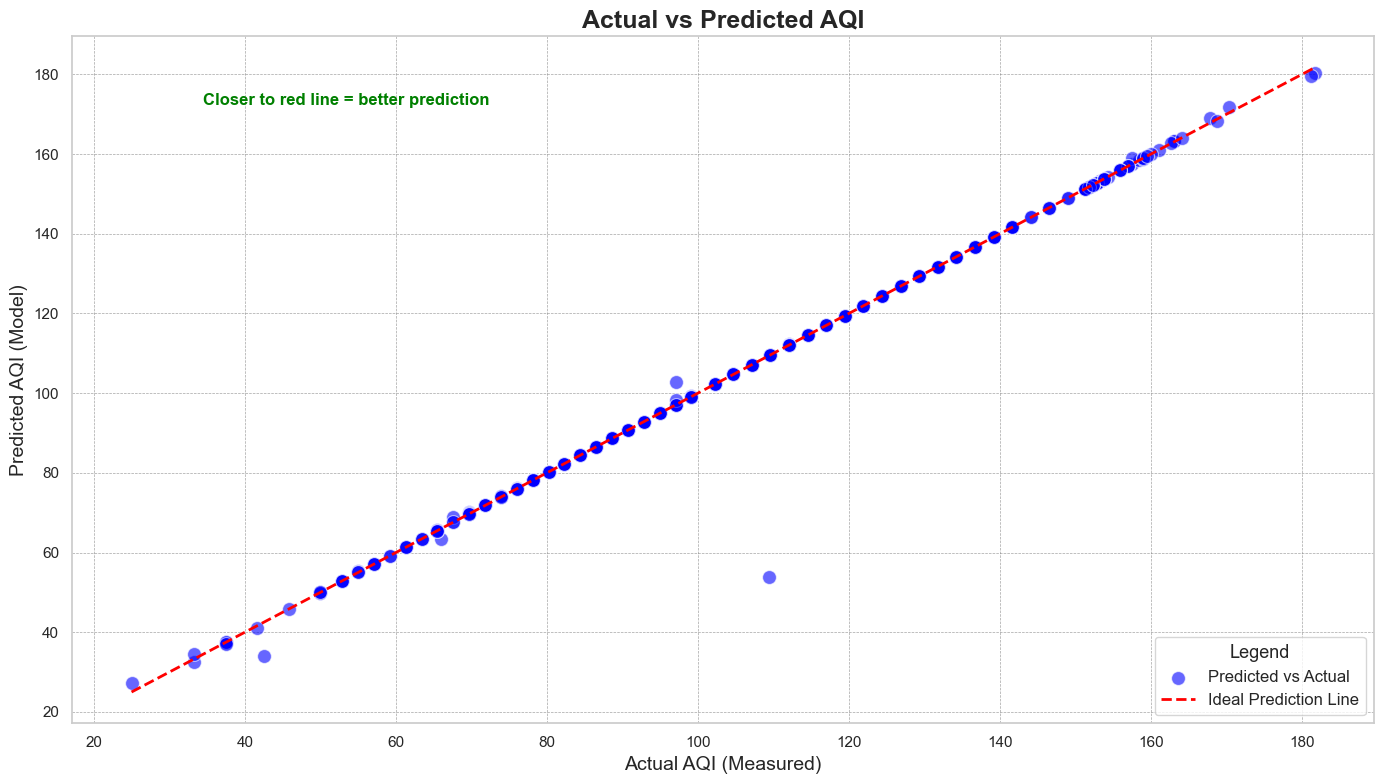

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
# Визуализация результатов
sns.set_theme(style="whitegrid")

# Прогнозы и реальные значения
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

# Создадим фигуру для визуализации
plt.figure(figsize=(14, 8))
sns.scatterplot(data=comparison_df, x='Actual', y='Predicted', color='blue', alpha=0.6, s=100, label='Predicted vs Actual')
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', lw=2, linestyle='--', label='Ideal Prediction Line')

# Добавим больше информации в график
plt.title('Actual vs Predicted AQI', fontsize=18, weight='bold')
plt.xlabel('Actual AQI (Measured)', fontsize=14)
plt.ylabel('Predicted AQI (Model)', fontsize=14)
plt.legend(fontsize=12, title="Legend", title_fontsize='13')
plt.annotate('Closer to red line = better prediction', 
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='green', weight='bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Отображение графика
plt.show()


In [40]:
predict_future(merged_data, '/Users/mmms/Developer/team10project/team10project/model/best_aqi_model.pkl')

,Predicted_AQI,Day
0,61.34700,Day 1
1,80.23000,Day 2
2,76.07985,Day 3
3,67.81975,Day 4
4,97.06000,Day 5
5,97.06000,Day 6
6,94.95000,Day 7
